# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## План выполнения проекта:

1. Загрузить и изучить данные.
2. Ответить на вопрос и обосновать решение. Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии
2.1. Изменится. Приведите примеры матриц.
2.2. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложить алгоритм преобразования данных для решения задачи. Обосновать, почему качество линейной регрессии не поменяется.
4. Запрограммировать этот алгоритм, применив матричные операции. Проверить, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применить метрику R2.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
print(df.head())#выведим 5 строк датасета

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0


In [3]:
df.info()#изучим тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
df['Возраст'] = df['Возраст'].astype(int)#переведем float в целые числа
df['Зарплата'] = df['Зарплата'].astype(int)
df.dtypes#проверим что все переведено в целочисленные значения

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [5]:
features = df.drop('Страховые выплаты', axis=1)#выделим признаки
target = df['Страховые выплаты']#выделим целевой признак

In [6]:
df.describe()#для описательной статистике вызовем функцию

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


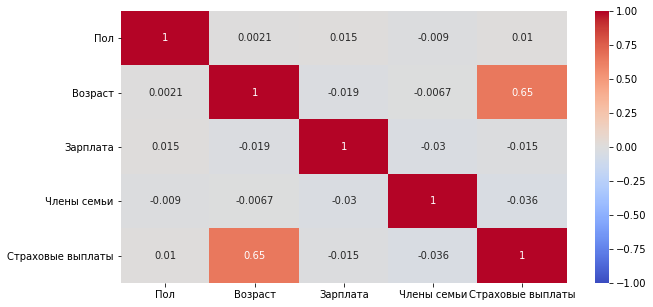

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(),  vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');#построим тепловую карту

___Комментарии:___ Мы проанализировали датафрейм, состоящий из пяти столбцов, из которых, целевой признак-страховые выплаты, численный. В столбце пол, бинарные данные, мужчина или женщина. В столбце возраст - от 18 лет до 65, в среднем 31 год. Зарплата от 5300 до 79000, в среднем 40000 руб, членов семьи до 6, страховые выплаты производились клиентам от 0 до 5 раз. По тепловой карте мы видим сильную корреляцию в зависимости от возраста и страховых выплат, следовательно можем предположить что возраст влияет на количество выплаченных стравых вознаграждений клиентам.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$
или
$$
X' = XP
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Вектор весов линейной регрессии будет вычисляться по формуле:

$$
w' = ((XP)^T(XP))^{-1}(XP)^T y
$$

так как:

$$
(AB)^T = B^T A^T
$$

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

$$
AA^{-1} = A^{-1} A = E
$$

$$
AE = EA = A
$$

Получаем при раскрытии скобок:

$$
w' = (P^T(X^T X)P)^{-1} P^T X^T y
$$

Если:

$$
 (P^T)^{-1}P^T =E
$$

Тогда:

$$
w' = P^{-1}(X^T X)^{-1}EX^T y = P^{-1}(X^T X)^{-1}X^T y
$$

получилась формула для w

$$
w' = P^{-1}(X^T X)^{-1}X^T y = P^{-1} w
$$

По уловию, матрица является обратимой, поэтому:

$$
PP^{-1}=E
$$

Подставим значения в формулу:

$$
A = XPP^{-1}w = XEw = Xw = A
$$


In [8]:
A = np.matrix([
    [4, 3],
    [5, 4]
])#приведем пример матрицы
B = np.linalg.inv(A)#найдем обратную матрицу
X = A.dot(B)#умножим матрицу на обратную
print(X)#получим ту же матрицу, только единичную

[[1. 0.]
 [0. 1.]]


**Ответ:** В результате получаем что качество линейной регресси не изменится, если признаки умножаться на обратимую матрицу

**Обоснование:** В результате мы получаем что A = Xw = X'w' = A Предсказания признаков умноженных на обратимую матрицу равны предсказаниям.

## Алгоритм преобразования

**Алгоритм**

* Поделим признаки и целевой признак на обучающую и тестовую выборки
* Обучим модель линейной регрессии на соответсвующих выборках и проверим качество на среднеквадратичной ошибке R2
* создадим массив случайных чисел распределения 4*4, так как признаков у нас 4, целевой признак 1. В результате будет одинаковая матрица, соответсвующая четырем столбцам признаков
* проверим что матрица обратимая, чтобы не было ошибки, если она не обратимая
* умножим признаки на сгенерированную матрицу
* обучим линейную регрессию по новым признакам сгенерированной матрице, целевой признак не изменится согласно формуле
* если мы проверим, что матрица не обратима, выводится ошибка, значит нужно создать цикл чтобы она сгенерировалась и проверялась на обратимость. Если матрица проходит проверку и она обратима, то она возвращается, если нет, то выходит из цикла.

## Проверка алгоритма

In [9]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=12345)
#отделяем 40% данных для тестовой выборки
print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(3000, 4)
(3000,)
(2000, 4)
(2000,)


In [10]:
model = LinearRegression()#вызовим линейную регрессию
model.fit(features_train, target_train)#обучим модель на тренировочной выборке
predictions = model.predict(features_test)#сделаем предсказания
print('Значение метрики на тестовой выборке R2:',r2_score(target_test, predictions))#напечатаем значение метрик R2

Значение метрики на тестовой выборке R2: 0.42375177828833077


In [11]:
def get_rand_matrix(df):
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(df.shape[1], df.shape[1]))
        det = np.linalg.det(matrix)
    return matrix


matrix = get_rand_matrix(features_train)
print(matrix)

features_train_w = features_train @ matrix
features_test_w = features_test @ matrix

model = LinearRegression()#вызовим линейную регрессию
model.fit(features_train_w, target_train)#обучим модель на тренировочной выборке
predictions_w = model.predict(features_test_w)#сделаем предсказания
print('Значение метрики на сгенерированной матрице R2:',r2_score(target_test, predictions_w))#напечатаем значение метрик R2

[[ 0.31359652  0.3545558  -0.30326966  1.61550223]
 [-0.85075141  1.91970216  0.64932931 -0.11261829]
 [ 0.95913603  0.15536744  1.90419771 -0.61574087]
 [ 0.16702571 -0.52339723 -0.65038873 -0.05580882]]
Значение метрики на сгенерированной матрице R2: 0.4237517782883432


In [12]:
# Функция get_rand_matrix не принимает в качесте аргумента случайную матрицу, она ее генерирует. 
# а принимает наш датасет, из котиорого она вытаскивает размерность: df.shape[1] чтобы сгенерировать рандомную матрицу нужного размера
# (не задаем цифрой, чтобы побольше автоматизации было), 



matrix = get_rand_matrix(features_train)
print(matrix)

features_train_w = features_train @ matrix


# А тут описка,  меняем features_train на features_test
# features_test_w = features_train @ matrix
features_test_w = features_test @ matrix

model = LinearRegression()#вызовим линейную регрессию
model.fit(features_train_w, target_train)#обучим модель на тренировочной выборке
predictions_w = model.predict(features_test_w)#сделаем предсказания
print('Значение метрики на сгенерированной матрице R2:',r2_score(target_test, predictions_w))#напечатаем значение метрик R2

[[ 0.14824332 -1.02217244 -0.25304939 -0.12574038]
 [-0.09296188 -0.58824194  0.46509925  0.16465893]
 [ 1.96809025  1.50308638 -3.43625569  1.06293779]
 [-0.06374531 -0.64544131  0.60448217  0.12012925]]
Значение метрики на сгенерированной матрице R2: 0.4237517782881919


___Вывод:___ Мы изучили данные клиентов и запрограммировали алгоритм, применив матричные операции. Применив метрику R2, убедились что качество линейной регрессии до и после преобразования не отличаются, в резултате можно обеспечить защиту данных клиентов путем умножения признаков на обратимую матрицу.